In [4]:
import pandas as pd

# Load the dataset
file_path = '/scratch/gl2758/PTSA/output/MSG_30min_raw_train.csv'
data = pd.read_csv(file_path)

In [6]:
# Display basic information about the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Drop or fill missing values if needed
data.dropna(inplace=True)

# Convert date columns to datetime format
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
# data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10848 entries, 0 to 10847
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   tpep_pickup_datetime  10848 non-null  datetime64[ns]
 1   passenger_count       10848 non-null  float64       
 2   trip_distance         10848 non-null  float64       
 3   DOLocationID          10848 non-null  int64         
 4   fare_amount           10848 non-null  float64       
 5   total_amount          10848 non-null  float64       
 6   tip_amount            10848 non-null  float64       
 7   pickup_count          10848 non-null  int64         
 8   is_holiday            10848 non-null  int64         
 9   pickup_time           10848 non-null  object        
 10  weekday               10848 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(4), object(1)
memory usage: 932.4+ KB
None
tpep_pickup_datetime    0
passenger_count        

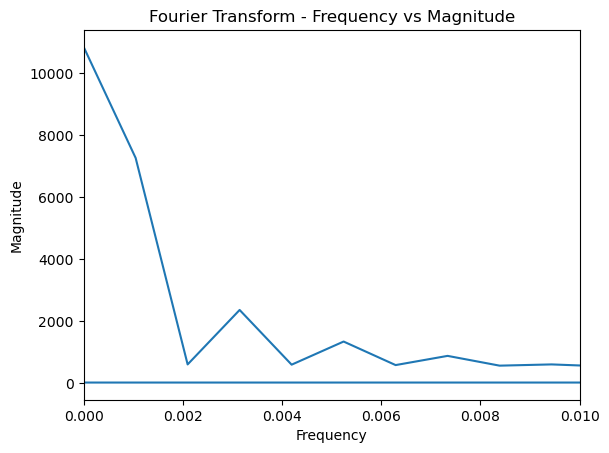

In [18]:
import numpy as np
import matplotlib.pyplot as plt
# Resample data to hourly frequency and count trips per hour
hourly_data = data.set_index('tpep_pickup_datetime').resample('12h').size()

# Apply Fourier Transform
fft_values = np.fft.fft(hourly_data)
frequencies = np.fft.fftfreq(len(fft_values))

# Plot the magnitude of the Fourier coefficients
plt.plot(frequencies, np.abs(fft_values))
plt.title('Fourier Transform - Frequency vs Magnitude')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.xlim(0, 0.01)  # Focus on lower frequencies for seasonal patterns
plt.show()

---

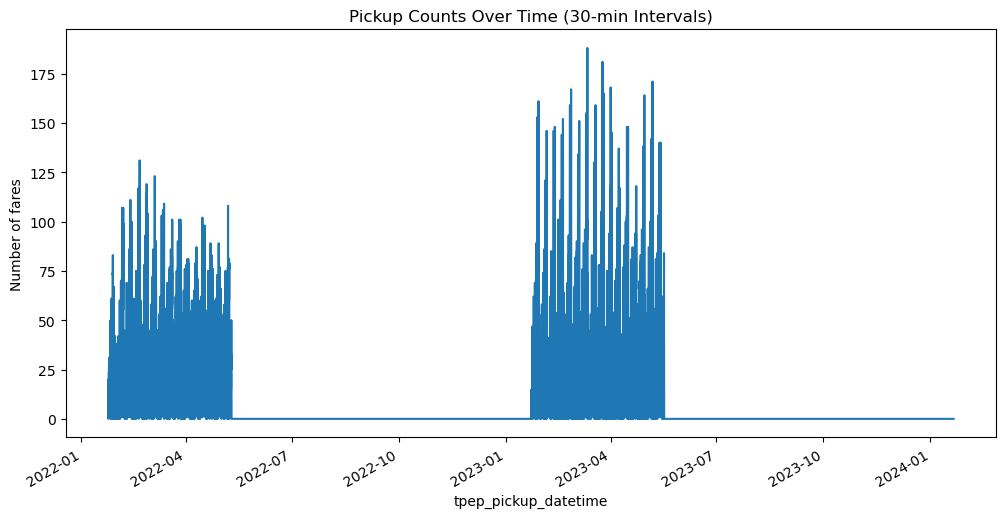

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the processed data
data = pd.read_csv("/scratch/gl2758/PTSA/output/full_data_30min.csv", parse_dates=["tpep_pickup_datetime"], index_col="tpep_pickup_datetime")

# Focus on the time series of interest (e.g., pickup counts)
time_series = data['Number_of_fares']

# Ensure there are no missing values
time_series = time_series.fillna(0)  # Fill missing values with 0 if necessary

# Plot the time series to visualize trends
plt.figure(figsize=(12, 6))
time_series.plot(title="Pickup Counts Over Time (30-min Intervals)", ylabel="Number of fares")
plt.show()

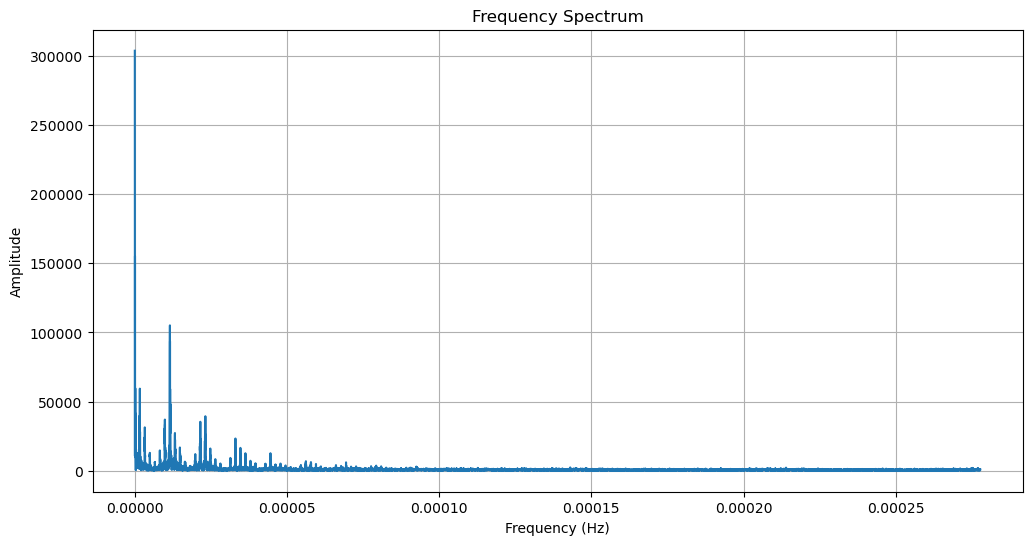

In [2]:
from scipy.fft import fft, fftfreq

# Perform Fourier Transform
N = len(time_series)  # Number of data points
T = 30 * 60  # Sampling interval in seconds (30 minutes)

fft_values = fft(time_series)  # Compute FFT
frequencies = fftfreq(N, T)  # Compute corresponding frequencies

# Only keep positive frequencies
positive_frequencies = frequencies[:N // 2]
positive_fft_values = np.abs(fft_values[:N // 2])  # Magnitude of FFT values

# Plot the frequency spectrum
plt.figure(figsize=(12, 6))
plt.plot(positive_frequencies, positive_fft_values)
plt.title("Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

In [3]:
# Convert frequencies to periods in hours
periods_in_seconds = 1 / positive_frequencies  # Period in seconds
periods_in_hours = periods_in_seconds / 3600   # Convert period to hours

# Filter out very high-frequency noise
valid_indices = positive_frequencies > 0
periods_in_hours = periods_in_hours[valid_indices]
positive_fft_values = positive_fft_values[valid_indices]

# Find the most significant periodicities
significant_periods = periods_in_hours[np.argsort(-positive_fft_values)[:5]]  # Top 5 significant periods

print("Top significant periodicities (in hours):", significant_periods)

Top significant periodicities (in hours): [8729.75       4364.875        24.08206897   24.01581843   24.14868603]


/state/partition1/job-54639972/ipykernel_3239721/978411738.py:2: RuntimeWarning: divide by zero encountered in divide
  periods_in_seconds = 1 / positive_frequencies  # Period in seconds


In [13]:
# Filter out zero frequencies to avoid division by zero
nonzero_frequencies = positive_frequencies[positive_frequencies > 0]

# Calculate periods in seconds and hours
periods_in_seconds = 1 / nonzero_frequencies  # Period in seconds
periods_in_hours = periods_in_seconds / 3600  # Convert period to hours

# Find the most significant periodicities
significant_periods = periods_in_hours[np.argsort(-positive_fft_values[:len(nonzero_frequencies)])[:5]]  # Top 5 significant periods

print("Top significant periodicities (in hours):", significant_periods)


Top significant periodicities (in hours): [8729.75       4364.875        24.08206897   24.01581843   24.14868603]


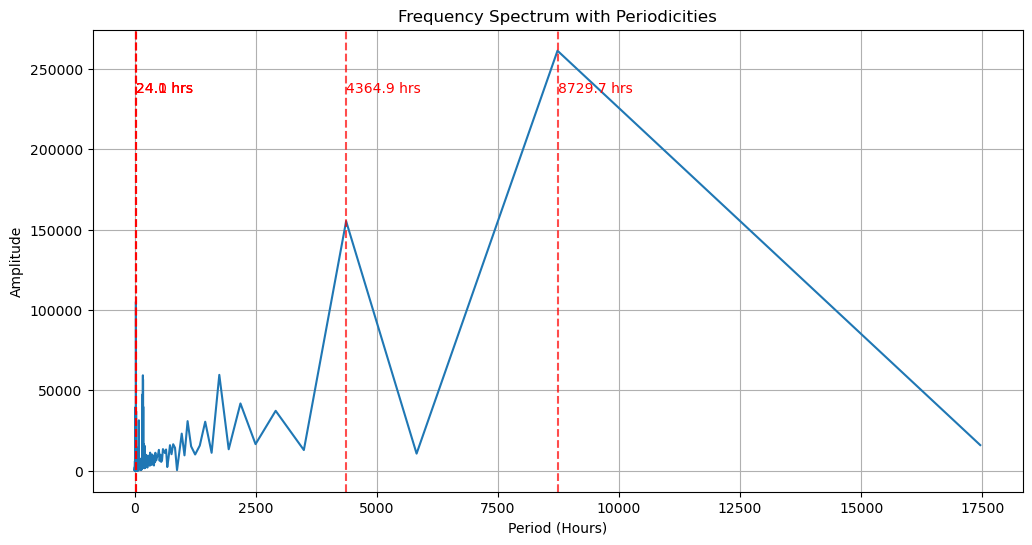

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(periods_in_hours, positive_fft_values)
plt.title("Frequency Spectrum with Periodicities")
plt.xlabel("Period (Hours)")
plt.ylabel("Amplitude")
plt.grid()

# Highlight top significant periods
for period in significant_periods:
    plt.axvline(x=period, color='red', linestyle='--', alpha=0.7)
    plt.text(period, max(positive_fft_values) * 0.9, f"{period:.1f} hrs", color='red')

plt.show()

In [15]:
print(f"Length of positive_frequencies: {len(positive_frequencies)}")
print(f"Length of positive_fft_values: {len(positive_fft_values)}")

Length of positive_frequencies: 17459
Length of positive_fft_values: 17459


In [16]:
# Only keep positive frequencies
valid_indices = frequencies > 0
positive_frequencies = frequencies[valid_indices]
positive_fft_values = np.abs(fft_values[valid_indices])


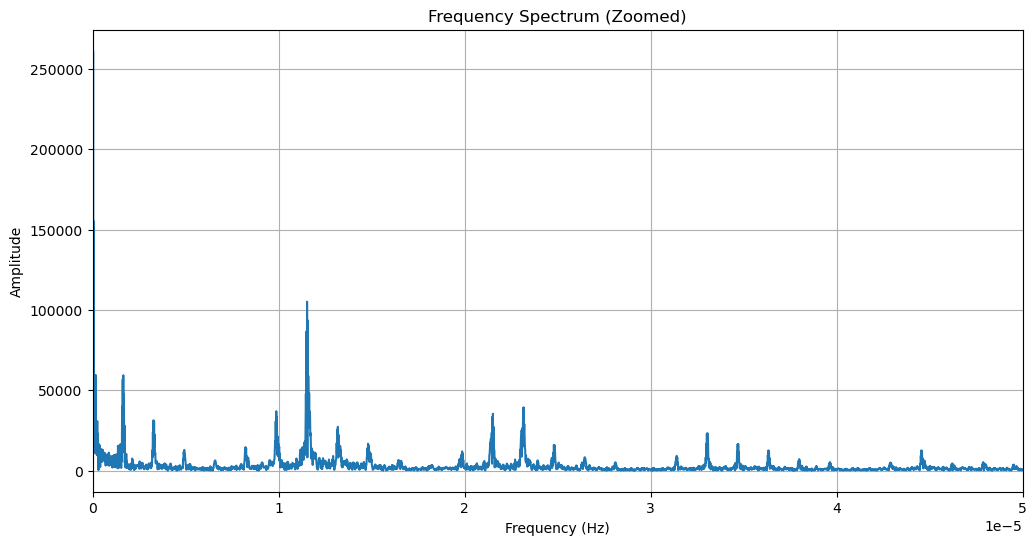

In [17]:
# Zoomed-in frequency spectrum
plt.figure(figsize=(12, 6))
plt.plot(positive_frequencies, positive_fft_values)
plt.title("Frequency Spectrum (Zoomed)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.xlim(0, 0.00005)  # Focus on low frequencies
plt.grid()
plt.show()

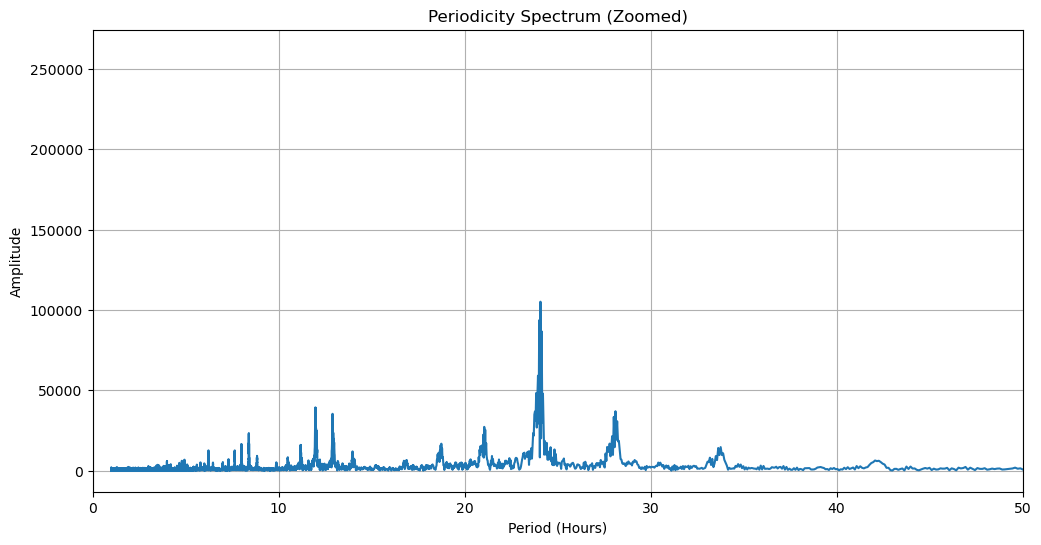

In [18]:
# Zoomed-in periodicity spectrum
plt.figure(figsize=(12, 6))
plt.plot(periods_in_hours, positive_fft_values)
plt.title("Periodicity Spectrum (Zoomed)")
plt.xlabel("Period (Hours)")
plt.ylabel("Amplitude")
plt.xlim(0, 50)  # Focus on shorter periods
plt.grid()
plt.show()
